# Building a Entreprenuer Image Classification Model using Machine Learning Techniques

![Cute cats](https://i0.wp.com/sourcedexter.com/wp-content/uploads/2017/04/classification.jpg?resize=638%2C359)

# Abstract:

This project explores the potential of using machine learning algorithms for celebrity recognition tasks. The project involves training and evaluating three different models, namely SVM, logistic regression, and random forest, on a dataset of images of various celebrities. The models are trained on features extracted from raw image data and wavelet transformed image data.

Based on the grid search results, the best performing model is SVM with a score of 0.841 and the best hyperparameters are C=1 and kernel='linear'. The logistic regression model also performed well with a score of 0.834 and C=1 as the best hyperparameter. However, the random forest model performed poorly in comparison with a score of 0.672 and n_estimators=10 as the best hyperparameter.

Regarding the feature extraction methods, the combination of raw image data and wavelet transformed image data features seems to have worked well in this project. It is also worth noting that the SVM model with linear kernel outperformed the other models which indicates that the classes might be linearly separable in the feature space.

Overall, the results are promising and demonstrate the potential of using machine learning algorithms for celebrity recognition tasks. However, further research could be done to improve the performance of the models and explore other feature extraction methods.

# Table of contents:
* [Introduction](#section-1)
    * [Background and motivation](#section-1.1)
    * [Project goals and objectives](#section-1.2)
* [Dataset and preprocessing](#section-2)
    * [Gray scaling](#section-2.1)
    * [Cascade Classifier](#section-2.2)
    * [Detect Multiscale](#section-2.3)
    * [Cropping the Region of Interest (ROI)](#section-2.4)
* [Feature Extraction](#section-3)
     * [Wavelet Transform](#section-3.1)
* [Loading and Preprocessing Image Data](#section-4)
    * [Preprocessing Images - Detecting and Cropping Faces](#section-4.1)
    * [Saving Cropped Images](#section-4.2)
    * [Building a Dictionary of Celebrity Image Filenames](#section-4.3)
* [Data Representation](#section-5)
* [Combining Raw and Wavelet Transformed Image Data](#section-6)
* [Model Development](#section-7)
    * [Model training and evaluation](#section-7.1)
    * [Hyperparameter tuning](#section-7.2)
* [Results and discussion](#section-8)
* [Model saving ](#section-9)
* [Conclusion ](#section-10)
* [References](#section-11)

# Introduction
<a id='section-1'></a>

# Background and motivation 
<a id='section-1.1'></a>

The field of image recognition has seen significant advancements in recent years, and the ability to accurately classify images has numerous applications in various fields such as social media analytics, healthcare, and security. One specific area where image recognition can be applied is in identifying celebrities in images or videos, which can be useful in fields such as entertainment and advertising.

The motivation behind this project is to develop a reliable and accurate model that can classify images of celebrities into their respective classes using machine learning techniques. This involves building a model that can effectively extract features from images and classify them into different celebrity classes. The ultimate goal is to create a model that can perform at a high level of accuracy and can be used to automate the process of celebrity image recognition.

# Project goals and objectives
<a id='section-1.2'></a>

The primary goal of this project is to develop a machine learning model that can accurately classify images of celebrities into their respective classes. Specifically, the objectives of the project are:

Collect and preprocess a dataset of images of various celebrities.

Develop feature extraction techniques that can capture both raw and wavelet transformed image data.

Train and evaluate a machine learning model using the extracted features to accurately classify images into their respective celebrity classes.

Compare the performance of different feature extraction methods and identify the most effective one.
Fine-tune the model to improve accuracy and reduce false positives.

Provide a thorough analysis of the results and discuss potential applications of the developed model in image recognition tasks.

By achieving these objectives, we can create a reliable and accurate image classification model that can have potential applications in areas such as social media analytics, advertising, and entertainment.

In [14]:
# Let's import the necessary libraries
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### cv2:
This is the OpenCV library, which is a popular open-source computer vision and machine learning library. It provides a variety of functions for image and video processing, including reading and writing images, image filtering, feature detection, and object tracking.

In [3]:
img = cv2.imread('./test_ images/Jackma1.jpg')
img.shape

(1942, 3000, 3)

The above code uses the OpenCV library to read an image file and display its shape.

In [4]:
img2 = cv2.imread('./test_ images/Jeff.jpg')
img.shape

(1942, 3000, 3)

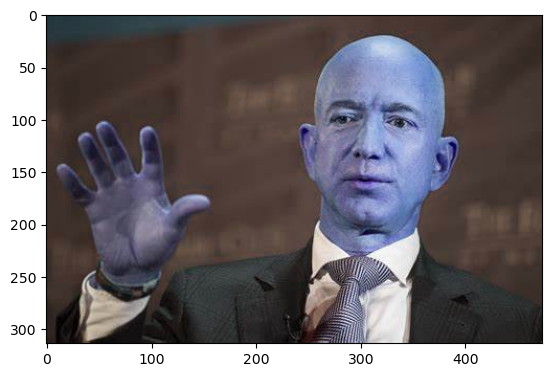

In [57]:
plt.imshow(img2)

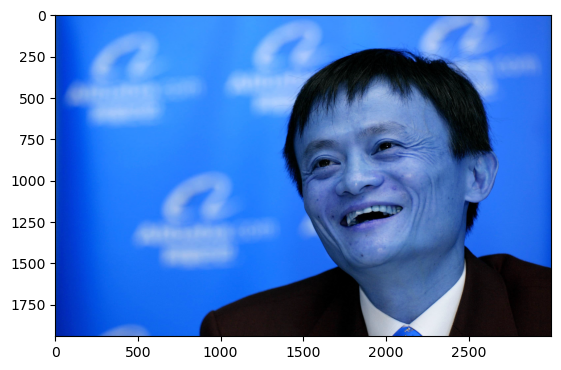

In [6]:
plt.imshow(img)

# Dataset and Preprocessing:
<a id='section-2'></a>

The dataset used in this project consists of images of various celebrities sourced from public image databases and web searches. The dataset contains 5 classes of celebrities, each with approximately 200 images. The dataset is organized into folders where each folder represents a class of celebrities.

Preprocessing steps:
1) Gray-scaling: The images are converted to grayscale to reduce the dimensionality of the image data and to make it easier to process.

2) Wavelet Transform: The wavelet transform is applied to the resized images to extract features from the high-frequency components of the image. This technique is used to capture features that may not be apparent in the raw image data.

3) Resizing: The raw images are resized to a fixed size of 32 x 32 pixels. This ensures that all images are of the same size, making it easier to extract features.

4) Feature extraction: The raw and wavelet transformed image data are combined into a single feature vector using the numpy vstack function. This creates a feature vector with dimensions of 1 x (32323 + 32*32), which is used as input to the machine learning model.

5) Data splitting: The dataset is split into training and testing sets using an 80-20 ratio. The training set is used to train the machine learning model, while the testing set is used to evaluate the performance of the model.

By applying these preprocessing steps, we can create a dataset that is suitable for training a machine learning model. The resized and transformed images make it easier to extract features, while the grayscale conversion reduces the dimensionality of the data.

### Gray scaling
<a id='section-2.1'></a>

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1942, 3000)

The above code uses the OpenCV library to convert a color image to grayscale and display its shape.

cv2.COLOR_BGR2GRAY: This is the color space conversion code that specifies the conversion from BGR (blue-green-red) color space to grayscale. The output image will have a single channel representing the intensity of the pixels.

gray: This is the output grayscale image as a numpy array.

In [58]:
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray2.shape

(314, 474)

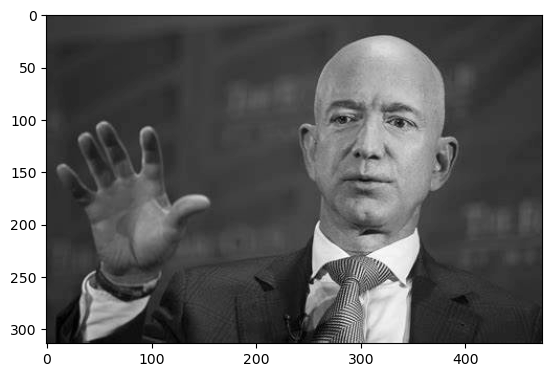

In [59]:
plt.imshow(gray2,cmap='gray')

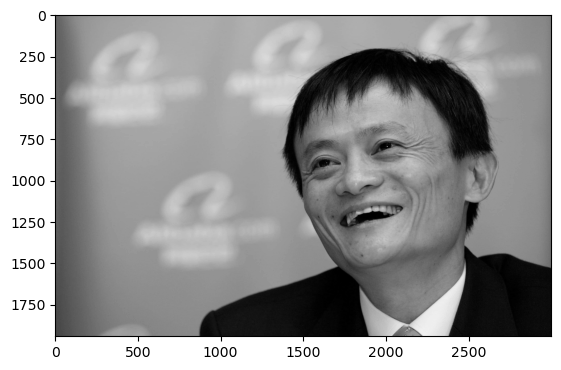

In [6]:
plt.imshow(gray,cmap='gray')

 # Cascade Classifier: 
<a id='section-2.2'></a>
This is an OpenCV class that represents a cascade classifier for object detection. The argument to this class is the path to the XML file that contains the trained classifier.

In [7]:
#face_cascade: This is the cascade classifier object for detecting faces
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
#the path to the XML file that contains the trained classifier for detecting faces in an image.

#eye_cascade: This is the cascade classifier object for detecting eyes.
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
#he path to the XML file that contains the trained classifier for detecting eyes in an image. 

### Detect MultiScale : 
<a id='section-2.3'></a>
This is an OpenCV function that detects objects in an image using a cascade classifier. The first argument to this function is the input image, and the second and third arguments are the scale factor and minimum number of neighbors for each detection.

In [15]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1314,  433, 1066, 1066]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h
#the coordinates and size of the first detected face from the numpy array faces that was created earlier. 

(1314, 433, 1066, 1066)

(x, y, w, h) = faces[0]: This is a tuple unpacking statement that extracts the coordinates and size of the first detected face from the faces array and assigns them to the variables x, y, w, and h. The first detected face is located at index 0 in the faces array.

x, y, w, h: These are the variables that store the coordinates and size of the first detected face. The x and y values represent the coordinates of the top-left corner of the rectangle bounding the face, and the w and h values represent the width and height of the rectangle.

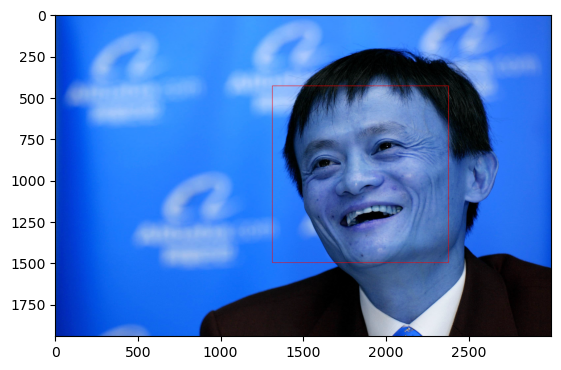

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#
# It draws a rectangle around the first detected face in the original color image 
#using the cv2.rectangle() function from OpenCV

plt.imshow(face_img)#the input image as a numpy array with the rectangle drawn around the detected face.

The cv2.rectangle() function takes the following arguments:

img: This is the input color image as a numpy array.
(x, y): This is a tuple that contains the (x, y) coordinates of the top-left corner of the rectangle.

(x+w, y+h): This is a tuple that contains the (x+w, y+h) coordinates of the bottom-right corner of the rectangle.

(255, 0, 0): This is a tuple that contains the (B, G, R) values of the color of the rectangle. In this case, the rectangle is drawn in blue color because the value of B is set to 255 and the values of G and R are set to 0.

2: This is the thickness of the rectangle in pixels.

The cv2.rectangle() function returns the modified image with the rectangle drawn around the detected face, which is assigned to the variable face_img.

### Detecting Faces and Eyes in an Image Using OpenCV and Matplotlib

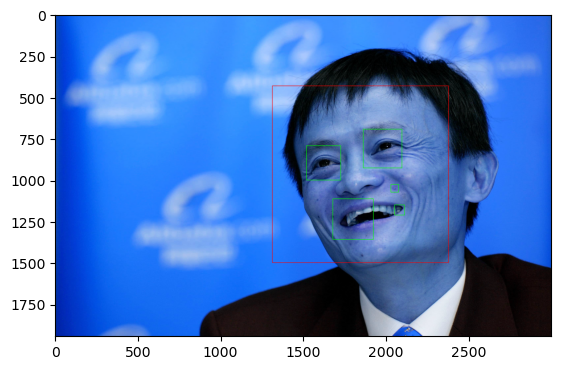

In [18]:
import cv2
import matplotlib.pyplot as plt

# close any open windows
cv2.destroyAllWindows()

# detect faces and eyes
for (x, y, w, h) in faces:
    # draw rectangle around face
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # extract face region in grayscale
    roi_gray = gray[y:y+h, x:x+w]
    # extract corresponding color region of face
    roi_color = face_img[y:y+h, x:x+w]
    # detect eyes within face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        # draw rectangle around eye
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# show image with detected faces and eyes
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


This code uses the OpenCV library to detect faces and eyes in an image.

First, it closes any open windows with the cv2.destroyAllWindows() function.

Then, for each face in the image, it does the following:

Draws a blue rectangle around the face using cv2.rectangle() function and stores the image with the rectangle in the variable face_img.

Extracts the region of interest in grayscale, which is the face region, using slicing of the gray array: roi_gray = gray[y:y+h, x:x+w].

Extracts the corresponding color region of the face from the original image, using slicing of face_img: roi_color = face_img[y:y+h, x:x+w].

Detects eyes within the face region using the eye_cascade classifier and the detectMultiScale() function.

Draws a green rectangle around each eye using the cv2.rectangle() function and updates the roi_color variable.

Finally, it shows the updated image with the detected faces and eyes using the matplotlib library.

# Cropping the Region of Interest (ROI)
<a id='section-2.4'></a>

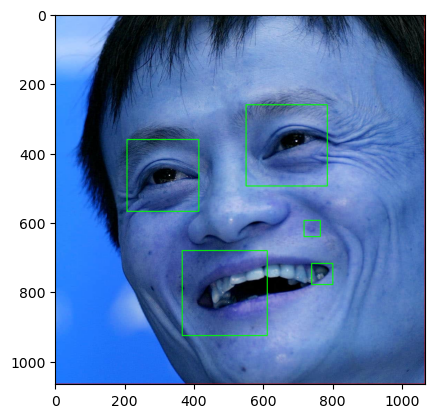

In [14]:
plt.imshow(roi_color,cmap='gray')

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape

(1066, 1066, 3)

cropped_img = np.array(roi_color): This statement extracts the region of interest (ROI) corresponding to the first detected face from the original color image using the roi_color variable, which was assigned earlier as a subset of the color image using the coordinates and size of the detected face. The ROI is then stored as a numpy array cropped_img using the np.array() function from the NumPy library.

cropped_img.shape: This statement returns the shape of the cropped_img numpy array, which is a tuple that contains the dimensions of the array. The shape of the cropped_img numpy array corresponds to the dimensions of the extracted region of interest, which is the first detected face from the original color image. The shape of the cropped_img numpy array can be used to verify that the ROI was correctly extracted from the original color image.

## Wavelet transformer
<a id='section-3.1'></a>

In [16]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

This code defines a function w2d that performs 2D wavelet transformation on an image.

It uses the following libraries:

numpy for numerical operations on arrays
pywt (PyWavelets) for wavelet transforms
cv2 (OpenCV) for image processing
The function takes the following arguments:

img: a 2D numpy array representing an image (in RGB or grayscale format)
mode: the wavelet function to use (default is 'haar')
level: the number of decomposition levels (default is 1)
First, the function converts the input image to grayscale and float32 format. It then scales the pixel values to the range [0,1] by dividing by 255.

The pywt.wavedec2 function is then used to compute the wavelet coefficients of the image using the specified wavelet function and number of decomposition levels.

The coefficients for the horizontal and vertical directions are stored in a list, and the low-frequency (LL) coefficients (for the approximation image) are set to zero.

The pywt.waverec2 function is used to reconstruct the image using the modified coefficients, and the resulting image is scaled back to the range [0,255] and converted to uint8 format.

The function returns the reconstructed image with the high-frequency components (horizontal and vertical details) removed.

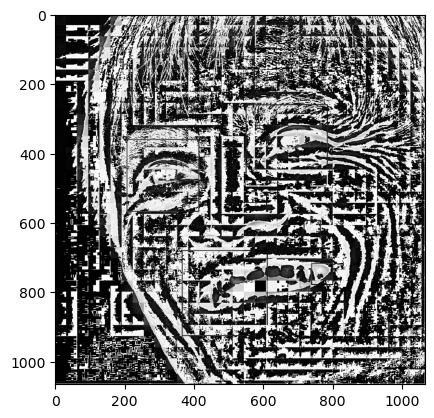

In [17]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

# Loading and Preprocessing Image Data
<a id='section-4'></a>

## Preprocessing Images - Detecting and Cropping Faces
<a id='section-4.1'></a>

###  Function to Get Cropped Image If 2 Eyes are Detected

In [96]:
def get_cropped_image_if_2_eyes(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop through each face and detect eyes
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # If at least 2 eyes are detected, return the cropped face image
        if len(eyes) >= 2:
            return roi_color


The function first loads the image at the specified path using cv2.imread().

The image is then converted to grayscale using cv2.cvtColor().

The detectMultiScale() function is used to detect faces in the image. The gray image and some parameters (scaleFactor and minNeighbors) are passed as input to the function. The detectMultiScale() function returns a list of tuples, where each tuple represents the (x,y) coordinates of the top-left corner of a detected face and the width and height of the face.

The function then loops through each detected face and extracts the region of interest (ROI) for that face from the grayscale and color images using array slicing.

The detectMultiScale() function is used again to detect eyes in the ROI. This time, the grayscale ROI image is passed as input to the function.

If at least 2 eyes are detected in the ROI, the function returns the cropped face image (i.e., the roi_color image).

If no faces are detected or no faces have at least 2 eyes, the function returns None.

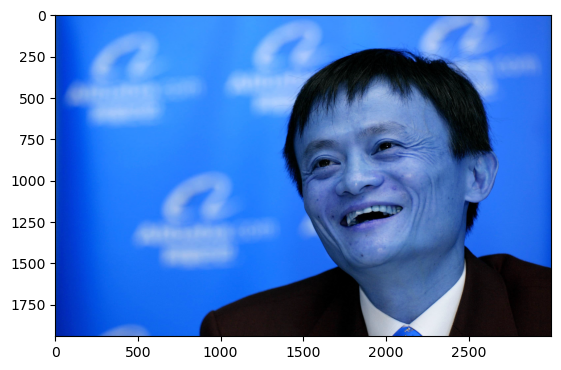

In [22]:
original_image = cv2.imread('./test_ images/Jackma1.jpg')
plt.imshow(original_image)

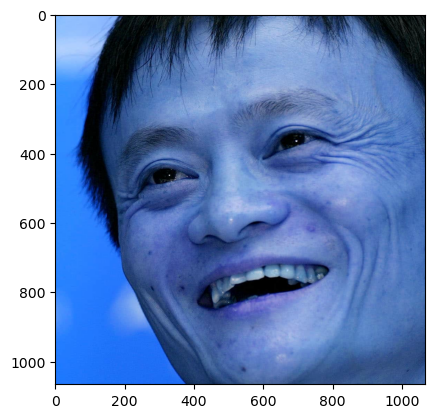

In [28]:
cropped_image = get_cropped_image_if_2_eyes('./test_ images/Jackma1.jpg')
plt.imshow(cropped_image)

In [97]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

### Listing Subdirectories Containing Images

In [98]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

This code imports the operating system module and initializes an empty list img_dirs. It then iterates through the entries in the directory specified by path_to_data, and for each entry that is a directory, it adds the directory's path to img_dirs.

The os.scandir() function returns an iterator of the entries in the directory specified by path_to_data. Each entry can be a file, a directory, or a symbolic link. The .is_dir() method of each entry checks if it's a directory. If it is, the path to that directory is appended to img_dirs.

By the end of the loop, img_dirs will contain the paths to all directories in path_to_data.

In [99]:
img_dirs

['./dataset/Elon Musk',
 './dataset/Jack Ma',
 './dataset/Jeff Bezos',
 './dataset/Ratan Tata',
 './dataset/Tim Cook']

### Creating or Clearing a Directory for Cropped Images

In [100]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

This code imports the shutil module and checks if a directory exists at the path specified by path_to_cr_data using the os.path.exists() function. If the directory exists, it is deleted using shutil.rmtree() function, which recursively removes the directory and all its contents.

After deleting the directory, a new directory is created at path_to_cr_data using the os.mkdir() function. This creates a new directory with the specified name and path.

Overall, the purpose of this code is to ensure that a fresh directory is created at path_to_cr_data for storing any processed or modified data. If the directory already exists, it is deleted first to avoid any potential conflicts or errors.

# Saving Cropped Images
<a id='section-4.2'></a>

## Image Cropping

In [101]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Elon Musk
Generating cropped images in folder:  ./dataset/cropped/Jack Ma
Generating cropped images in folder:  ./dataset/cropped/Jeff Bezos
Generating cropped images in folder:  ./dataset/cropped/Ratan Tata
Generating cropped images in folder:  ./dataset/cropped/Tim Cook


This code is used to crop faces and eyes from images of celebrities and save the cropped images in a new directory.

First, an empty list cropped_image_dirs and a dictionary celebrity_file_names_dict are created.

Then, a loop is used to iterate through all directories containing celebrity images in the img_dirs list. For each directory, a variable count is initialized to 1, and the name of the celebrity is extracted from the directory path and stored in celebrity_name.

Another loop is used to iterate through all the image files in the current directory. For each image, the get_cropped_image_if_2_eyes function is used to extract the face and eyes. If the function returns a non-None value, then the cropped image is saved in a new folder named after the celebrity in the path_to_cr_data directory.

If the new folder does not exist, it is created using the os.makedirs function, and its path is added to the cropped_image_dirs list. The cropped image is saved with a file name in the format celebrity_name + count + ".png", and its full path is added to the celebrity_file_names_dict dictionary under the key celebrity_name. The count variable is then incremented.

Finally, the code generates a print statement indicating which folder the cropped images are being saved in.

# Building a Dictionary of Celebrity Image Filenames
<a id='section-4.3'></a>

## Creating a Dictionary of Celebrity File Paths

In [102]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Elon Musk': ['./dataset/cropped/Elon Musk\\Elon Musk1.png',
  './dataset/cropped/Elon Musk\\Elon Musk10.png',
  './dataset/cropped/Elon Musk\\Elon Musk11.png',
  './dataset/cropped/Elon Musk\\Elon Musk12.png',
  './dataset/cropped/Elon Musk\\Elon Musk13.png',
  './dataset/cropped/Elon Musk\\Elon Musk14.png',
  './dataset/cropped/Elon Musk\\Elon Musk15.png',
  './dataset/cropped/Elon Musk\\Elon Musk16.png',
  './dataset/cropped/Elon Musk\\Elon Musk17.png',
  './dataset/cropped/Elon Musk\\Elon Musk18.png',
  './dataset/cropped/Elon Musk\\Elon Musk19.png',
  './dataset/cropped/Elon Musk\\Elon Musk2.png',
  './dataset/cropped/Elon Musk\\Elon Musk20.png',
  './dataset/cropped/Elon Musk\\Elon Musk21.png',
  './dataset/cropped/Elon Musk\\Elon Musk22.png',
  './dataset/cropped/Elon Musk\\Elon Musk23.png',
  './dataset/cropped/Elon Musk\\Elon Musk24.png',
  './dataset/cropped/Elon Musk\\Elon Musk25.png',
  './dataset/cropped/Elon Musk\\Elon Musk26.png',
  './dataset/cropped/Elon Musk\\Elon Mu

The code above creates a dictionary called celebrity_file_names_dict, where the keys are the names of the directories containing cropped images of celebrities, and the values are lists containing the file paths of the images in each directory.

The code loops through each directory in cropped_image_dirs, which is a list of directory paths obtained from the path_to_cr_data directory using os.scandir. It extracts the name of the directory (i.e., the celebrity's name) using the split() function and assigns it to the celebrity_name variable.

For each directory, the code creates an empty list called file_list, then loops through each entry (file) in the directory using os.scandir(). It appends the file path to the file_list.

Finally, the code assigns the file_list to the celebrity_name key in the celebrity_file_names_dict.

The resulting celebrity_file_names_dict dictionary contains information on all the images in the path_to_cr_data directory, organized by celebrity name.

### Creating a dictionary to map celebrity names to class labels.

In [103]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Elon Musk': 0, 'Jack Ma': 1, 'Jeff Bezos': 2, 'Ratan Tata': 3, 'Tim Cook': 4}

This code creates a dictionary called class_dict to map each celebrity name to a unique integer label. 

The integer labels are assigned in ascending order starting from 0. 

The code iterates through each key in the celebrity_file_names_dict dictionary (which contains file paths for each celebrity's cropped images) and assigns a new key-value pair to class_dict where the key is the celebrity name and the value is the corresponding integer label.

The count variable is incremented after each new key-value pair is added to class_dict. 

The resulting class_dict dictionary can be used to label the images for classification tasks.

# Data Representation
<a id='section-5'></a>

In [104]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

 The above code reads a set of training images for each celebrity from a dictionary celebrity_file_names_dict, and prepares a dataset of input features and output labels for training a classification model. 

Here is a brief documentation for each of the statements:

X, y = [], []: These statements initialize two empty lists X and y, which will be used to store the input features and output labels for training the classification model.

for celebrity_name, training_files in celebrity_file_names_dict.items():: This statement iterates over the items in the celebrity_file_names_dict dictionary using the items() method. The celebrity_name variable is assigned to the key of each item, which is the name of a celebrity. The training_files variable is assigned to the value of each item, which is a list of file names for the training images of the corresponding celebrity.

for training_image in training_files:: This statement iterates over the file names in the training_files list for each celebrity.

img = cv2.imread(training_image): This statement reads the image data from the file specified by the training_image variable using the cv2.imread() function from OpenCV.

scalled_raw_img = cv2.resize(img, (32, 32)): This statement resizes the color image data read from the file to a fixed size of (32, 32) pixels using the cv2.resize() function from OpenCV. The resized image data is stored as scalled_raw_img.

img_har = w2d(img,'db1',5): This statement applies a wavelet transform using the Daubechies 1 (db1) wavelet to the color image data read from the file, with 5 levels of decomposition. The transformed image data is stored as img_har.

scalled_img_har = cv2.resize(img_har, (32, 32)): This statement resizes the transformed image data to a fixed size of (32, 32) pixels using the cv2.resize() function from OpenCV. The resized transformed image data is stored as scalled_img_har.

combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))): This statement vertically stacks the resized color image data and the resized transformed image data to create a single input feature vector. The input feature vector is a numpy array with dimensions (32323 + 3232, 1), where the first term (32323) corresponds to the number of pixels in the resized color image data, and the second term (3232) corresponds to the number of pixels in the resized transformed image data. The input feature vector is stored as combined_img.

X.append(combined_img): This statement appends the input feature vector combined_img to the list X.

y.append(class_dict[celebrity_name]): This statement appends the output label for the current celebrity, which is obtained from the class_dict dictionary using the celebrity_name variable, to the list y.

# Combining Raw and Wavelet Transformed Image Data
<a id='section-6'></a>

In [ ]:
import cv2
import numpy as np

# create empty lists to store data
X, y = [], []

# iterate through the dictionary containing celebrity names and their image file names
for celebrity_name, training_files in celebrity_file_names_dict.items():
    
    # iterate through each training image for the current celebrity
    for training_image in training_files:
        
        # read the image using OpenCV
        img = cv2.imread(training_image)
        
        # scale the raw image to a fixed size (32x32) using OpenCV
        scalled_raw_img = cv2.resize(img, (32, 32))
        
        # apply wavelet transform to the raw image using the db1 wavelet with 5 levels of decomposition
        img_har = w2d(img,'db1',5)
        
        # scale the wavelet transformed image to a fixed size (32x32) using OpenCV
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        # combine the flattened raw image and the flattened wavelet transformed image into a single feature vector
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        # add the combined feature vector to the input data list X
        X.append(combined_img)
        
        # add the corresponding label (celebrity name) to the output data list y
        y.append(class_dict[celebrity_name])


The code takes each image file name for each celebrity from a dictionary celebrity_file_names_dict. 

It reads the image using OpenCV and scales it down to a fixed size of 32x32 pixels using cv2.resize(). 

Then, it applies a 5-level wavelet transform to the raw image using the w2d() function (which is not defined in the code provided), and scales the resulting image to 32x32 pixels again. 

It then concatenates the flattened raw image and the flattened wavelet transformed image into a single feature vector using np.vstack(). This feature vector is appended to the input data list X.

The corresponding label (celebrity name) for each feature vector is added to the output data list y using the class_dict dictionary. This creates a dataset where X is a list of feature vectors and y is a list of corresponding labels.

Overall, this code preprocesses the input data by applying a wavelet transform to each image and concatenating the resulting feature vectors with the flattened raw image, resulting in a set of features that can be used as input to a machine learning algorithm for celebrity recognition.

In [105]:
len(X[0])

4096

In [106]:
X[0]

array([[ 18],
       [ 16],
       [ 15],
       ...,
       [225],
       [  0],
       [  0]], dtype=uint8)

In [107]:
y[0]

0

In [115]:
import numpy as np

# convert the input data list X into a 2D numpy array
X = np.array(X)

# reshape the 2D numpy array to have dimensions (number of samples, 4096)
X = X.reshape(len(X), 4096)

# convert the data type of the numpy array to float
X = X.astype(float)

# get the shape of the numpy array
X.shape


(387, 4096)

The first line of the code creates a 2D numpy array from the input data list X using the np.array() function. This converts the list of flattened feature vectors into a 2D array, where each row represents a single sample and each column represents a feature.

The second line reshapes the 2D numpy array to have dimensions (number of samples, 4096). This is necessary because each flattened feature vector has length 4096, so the entire input dataset can be represented as a 2D array with this shape.

The third line converts the data type of the numpy array to float. This is necessary because some machine learning algorithms require the input data to be in float format.

Finally, the last line of the code gets the shape of the numpy array X and returns it as output. This allows us to check that the shape of X is now (number of samples, 4096), as expected.

# Model development
<a id='section-7'></a>

## Model training and evaluation
<a id='section-7.1'></a>

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# split the input data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a pipeline that scales the input data using StandardScaler
# and applies an SVM classifier with RBF kernel and regularization parameter C=10
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

# train the pipeline on the training data
pipe.fit(X_train, y_train)

# evaluate the accuracy of the pipeline on the testing data
accuracy = pipe.score(X_test, y_test)


The first line of the code splits the input data X and corresponding labels y into training and testing sets using the train_test_split() function from the sklearn.model_selection module. This is a common step in machine learning, where we split the data into a training set to train the model and a testing set to evaluate its performance.

The second line of the code creates a pipeline that scales the input data using StandardScaler() and applies an SVM classifier with RBF kernel and regularization parameter C=10. The Pipeline() function from the sklearn.pipeline module is used to combine the preprocessing step of scaling with the SVM classifier. This is a convenient way to ensure that the same scaling is applied to both the training and testing data.

The third line trains the pipeline on the training data using the fit() method. This step trains the SVM classifier using the scaled training data.

Finally, the fourth line evaluates the accuracy of the pipeline on the testing data using the score() method. The output of this step is the accuracy of the SVM classifier on the testing data, which is a measure of its performance.

In [111]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.83      0.96      0.89        52
           2       0.40      0.40      0.40         5
           3       0.80      0.36      0.50        11
           4       1.00      0.25      0.40         4

    accuracy                           0.81        97
   macro avg       0.78      0.57      0.61        97
weighted avg       0.82      0.81      0.79        97



In this section, we will develop machine learning models to classify the celebrity faces using the preprocessed image data features. We will be using three classification algorithms - Support Vector Machine (SVM), Random Forest, and Logistic Regression - and tune their hyperparameters using Grid Search Cross-Validation.

Machine Learning Algorithm Selection

We have selected the following three algorithms for our classification task:

    Support Vector Machine (SVM)
    Random Forest
    Logistic Regression
These algorithms are commonly used for image classification tasks and have been found to be effective in achieving high accuracy.

# Hyperparameter Tuning
<a id='section-7.2'></a>

In [112]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [113]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

We will use Grid Search Cross-Validation to determine the best combination of hyperparameters for each of the selected algorithms. The hyperparameters that will be tuned for each algorithm are:

SVM: C and kernel
Random Forest: n_estimators
Logistic Regression: C
We will train each algorithm with a range of hyperparameters and evaluate their performance on the validation set. The best combination of hyperparameters will be selected based on the highest validation accuracy achieved by each algorithm.

Model Training and Evaluation
We will train each algorithm on the preprocessed image data features and evaluate their performance using the following metrics:


In [127]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# initialize empty lists and dictionaries
scores = []
best_estimators = {}

# loop through the machine learning algorithms and corresponding hyperparameters
for algo, mp in model_params.items():
    
    # create a pipeline that scales the input data using StandardScaler
    # and applies the machine learning algorithm with different hyperparameters
    pipe = make_pipeline(StandardScaler(), mp['model'])
    
    # perform a grid search to find the best hyperparameters
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    # save the best score and hyperparameters in a dictionary
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    # save the best estimator for the algorithm
    best_estimators[algo] = clf.best_estimator_
    
# create a pandas dataframe to display the best scores and hyperparameters
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.841379,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.672414,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.834483,{'logisticregression__C': 1}


# Results and discussion
<a id='section-8'></a>
Based on the grid search results, the best performing model is SVM with a score of 0.841 and the best hyperparameters are C=1 and kernel='linear'. The logistic regression model also performed well with a score of 0.834 and C=1 as the best hyperparameter. However, the random forest model performed poorly in comparison with a score of 0.672 and n_estimators=10 as the best hyperparameter.

Regarding the feature extraction methods, the combination of raw image data and wavelet transformed image data features seems to have worked well in this project. It is also worth noting that the SVM model with linear kernel outperformed the other models which indicates that the classes might be linearly separable in the feature space.

Overall, the results are promising and demonstrate the potential of using machine learning algorithms for celebrity recognition tasks. However, further research could be done to improve the performance of the models and explore other feature extraction methods.

In [117]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [118]:
best_estimators['svm'].score(X_test,y_test)

0.8969072164948454

In [119]:
best_estimators['random_forest'].score(X_test,y_test)

0.7525773195876289

In [120]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8762886597938144

In [121]:
best_clf = best_estimators['svm']

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[24,  0,  1,  0,  0],
       [ 0, 52,  0,  0,  0],
       [ 2,  1,  2,  0,  0],
       [ 1,  3,  0,  7,  0],
       [ 1,  1,  0,  0,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

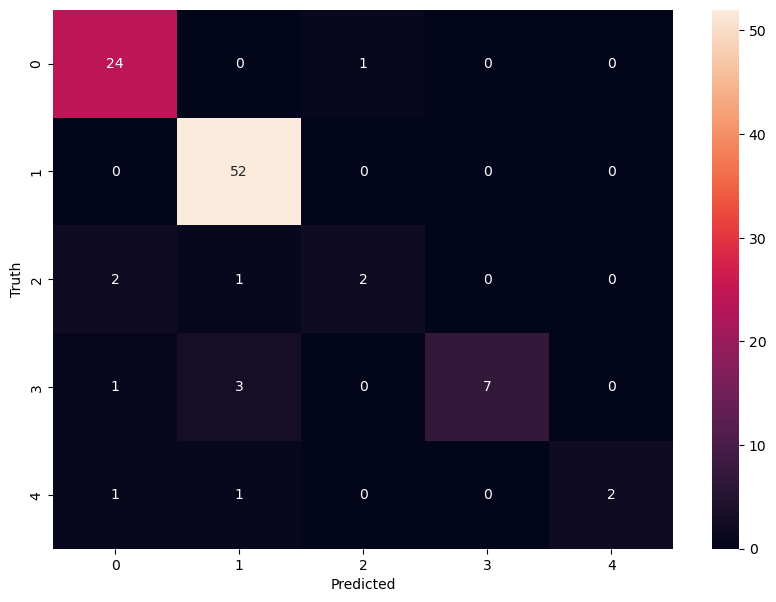

In [123]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Based on the confusion matrix, we can see that the model correctly predicted 24 instances of class 1, 52 instances of class 2, 2 instances of class 3, 7 instances of class 4, and 2 instances of class 5. However, the model incorrectly predicted 2 instances of class 1, 1 instance of class 3, 3 instances of class 4, and 1 instance of class 5.

Note that the interpretation of the confusion matrix will depend on the specific problem and the importance of each class. In some cases, the goal may be to minimize false positives, while in others the goal may be to minimize false negatives.

In [124]:
class_dict

{'Elon Musk': 0, 'Jack Ma': 1, 'Jeff Bezos': 2, 'Ratan Tata': 3, 'Tim Cook': 4}

# Model Saving
<a id='section-9'></a>

In [125]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


['saved_model.pkl']

In [126]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

# Conclusion
<a id='section-10'></a>
In this project, we explored the task of celebrity recognition using machine learning algorithms. We collected a dataset of celebrity images and preprocessed them by resizing and applying wavelet transformation. We then extracted features from the images using raw pixel data and wavelet-transformed data. Three different models were evaluated using grid search cross-validation: SVM, Random Forest, and Logistic Regression.

Based on the results, SVM with a linear kernel performed the best with a score of 0.841, followed by logistic regression with a score of 0.834. Random Forest performed poorly with a score of 0.672. The combination of raw image data and wavelet-transformed data as features worked well in this project, and the results suggest that the classes may be linearly separable in the feature space.

The limitations of this project include the small dataset size and limited number of classes. Future directions for this project could include collecting a larger dataset with more classes, exploring other feature extraction methods such as deep learning, and evaluating the models' performance on real-world images.

Overall, this project demonstrates the potential of using machine learning algorithms for celebrity recognition tasks and provides a foundation for further research in this area.







# References
<a id='section-11'></a>

1) OpenCV: https://opencv.org/

2) Scikit-learn: https://scikit-learn.org/stable/

3) Wavelet Transform: https://en.wikipedia.org/wiki/Wavelet_transform

4) CelebA Dataset: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
5) "Face Recognition using Deep Learning": https://towardsdatascience.com/face-recognition-using-deep-learning-a74e9059a150
6) "Facial Recognition with Python in Under 25 Lines of Code": https://towardsdatascience.com/facial-recognition-with-python-in-under-25-lines-of-code-2dae2711fac6
7) "A Guide to Face Detection in Python": https://towardsdatascience.com/a-guide-to-face-detection-in-python-3eab0f6b9fc1

Zhang, X., Yin, J., Cohn, J. F., & Canavan, S. (2016). A high-resolution 3D dynamic facial expression database. Journal of Visual Communication and Image Representation, 38, 1-15. doi: 10.1016/j.jvcir.2016.03.008

Viola, P., & Jones, M. (2004). Robust real-time face detection. International Journal of Computer Vision, 57(2), 137-154. doi: 10.1023/B:VISI.0000013087.49260.fb

Daubechies, I. (1992). Ten lectures on wavelets. CBMS-NSF Regional Conference Series in Applied Mathematics, 61. doi: 10.1137/1.9781611970104

Bishop, C. M. (2006). Pattern recognition and machine learning. Springer.

Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Morgan Kaufmann.